In [32]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
# Load dataset

data = pd.read_csv('r_news_top_jan_to_may_2021.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,duplicate,Engagement
0,lr3xap,Man dies after police kneel on his neck for ne...,https://amp.cnn.com/cnn/2021/02/23/us/angelo-q...,monaleeparis,100226,2021-02-23 20:43:30,17754,/r/news/comments/lr3xap/man_dies_after_police_...,NaN,False,117980
1,lsmh36,Texan files $1 billion class-action lawsuit af...,https://abcnews.go.com/US/texan-files-billion-...,ACABBLM2020,97551,2021-02-25 17:30:11,14574,/r/news/comments/lsmh36/texan_files_1_billion_...,NaN,False,112125
2,ls7xmj,Trump tax returns are now in the hands of the ...,https://www.cnbc.com/2021/02/25/trump-tax-retu...,[deleted],98318,2021-02-25 06:38:18,12719,/r/news/comments/ls7xmj/trump_tax_returns_are_...,NaN,True,111037
3,laun1r,Minneapolis police officers must keep body cam...,https://www.cnn.com/2021/02/02/us/minneapolis-...,dlkapt3,103302,2021-02-02 04:42:35,7312,/r/news/comments/laun1r/minneapolis_police_off...,NaN,False,110614
4,lsbgop,Costco lifts minimum wage above Amazon or Targ...,https://www.reuters.com/article/us-costco-whol...,candordirect,99299,2021-02-25 09:11:08,8124,/r/news/comments/lsbgop/costco_lifts_minimum_w...,NaN,False,107423


In [3]:
# Basic stats and info
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11240 entries, 0 to 11239
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Post ID                11240 non-null  object
 1   Title                  11240 non-null  object
 2   Url                    11240 non-null  object
 3   Author                 11240 non-null  object
 4   Score                  11240 non-null  int64 
 5   Publish Date           11240 non-null  object
 6   Total No. of Comments  11240 non-null  int64 
 7   Permalink              11240 non-null  object
 8   Flair                  1406 non-null   object
 9   duplicate              11240 non-null  bool  
 10  Engagement             11240 non-null  int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 889.2+ KB


,Score,Total No. of Comments,Engagement
count,11240.000000,11240.000000,11240.000000
mean,348.642527,315.755249,664.397776
std,3859.455582,1137.370254,4369.823990
min,0.000000,0.000000,10.000000
25%,1.000000,16.000000,21.000000
50%,1.000000,40.000000,52.000000
75%,6.250000,154.000000,192.000000
max,103302.000000,41107.000000,117980.000000


<AxesSubplot:xlabel='Score', ylabel='Total No. of Comments'>

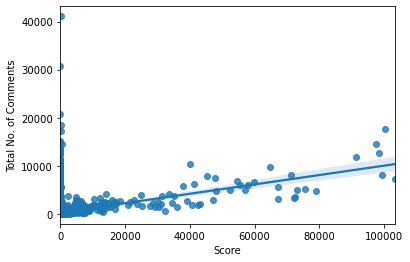

In [4]:
# Check relationship between Score and # Comments
sns.regplot(x=data.Score, y=data['Total No. of Comments'])

There are clear outliers in both directions, and a pretty weak positive relationship. Engagement doesn't seem to be useful in aggregate, but is good to set the cutoff for our data set. 

In [5]:
# Add Percentile to the headlines

data['score_percentile'] = data.Score.rank(pct=True)
data['comments_percentile'] = data['Total No. of Comments'].rank(pct=True)


In [6]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50)
bands = [(data['score_percentile'] >= .9), (data['score_percentile'] < .9) & (data['score_percentile'] > .5), (data['score_percentile'] <= .5)]
values = ['Top 10', 'Middle 40', 'Bottom 50']
data['score_band'] = np.select(bands, values)

In [7]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50) for comments now
bands = [(data['comments_percentile'] >= .9), (data['comments_percentile'] < .9) & (data['comments_percentile'] > .5), (data['comments_percentile'] <= .5)]
values = ['Top 10', 'Middle 40', 'Bottom 50']
data['comm_band'] = np.select(bands, values)

In [8]:
# Make data sets for each band
data_score_10 = data[data['score_band'] == 'Top 10']
data_score_40 = data[data['score_band'] == 'Middle 40']
data_score_50 = data[data['score_band'] == 'Bottom 50']
data_comm_10 = data[data['comm_band'] == 'Top 10']
data_comm_40 = data[data['comm_band'] == 'Middle 40']
data_comm_50 = data[data['comm_band'] == 'Bottom 50']

<AxesSubplot:xlabel='score_band', ylabel='Score'>

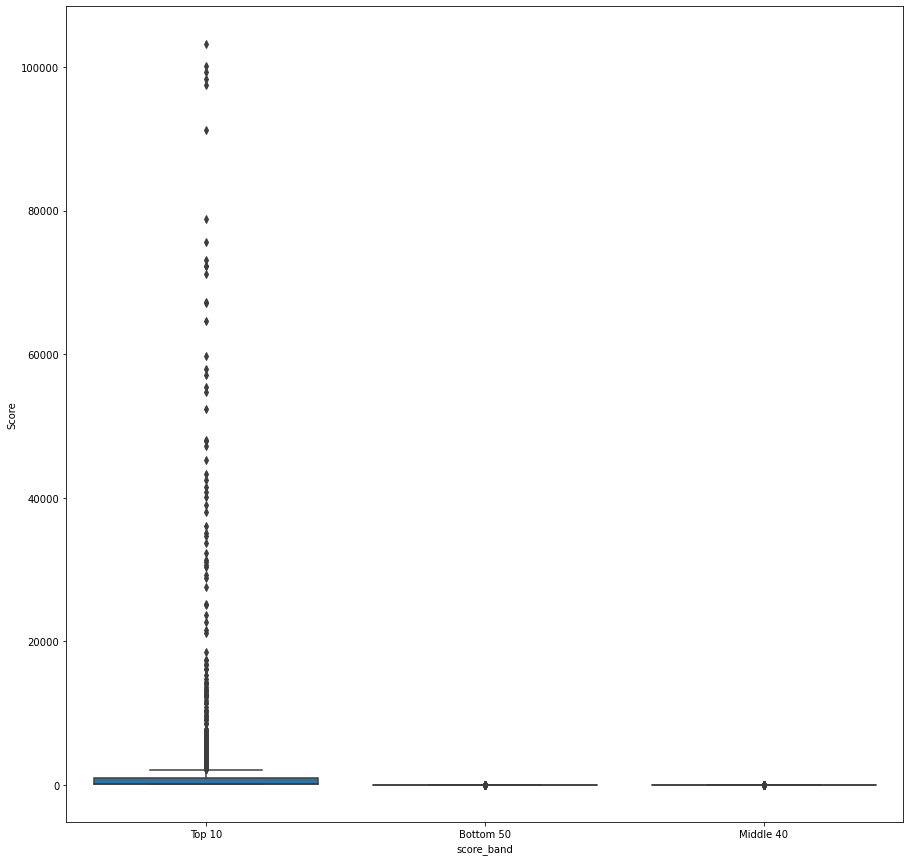

In [13]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data['Score'], x=data['score_band'], y=data['Score'])

<AxesSubplot:xlabel='comm_band', ylabel='Total No. of Comments'>

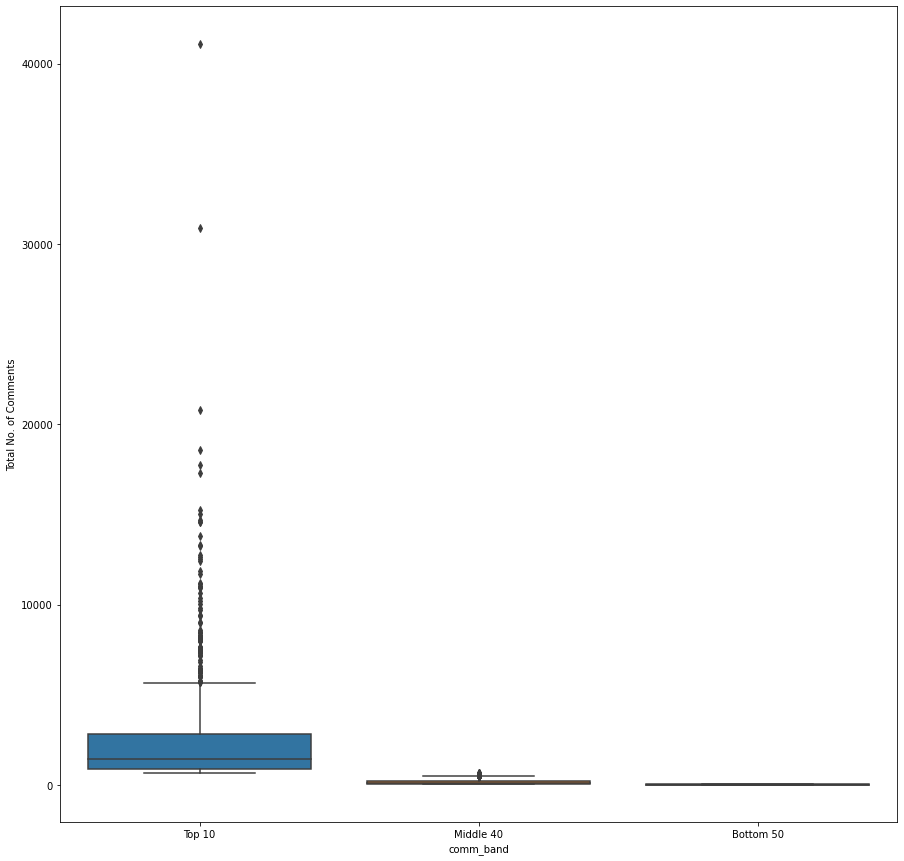

In [19]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data['Total No. of Comments'], x=data['comm_band'], y=data['Total No. of Comments'])

In [16]:
# Colossal gap beteen top story's score and bottom story's, even within the band
# Consider a 1%/49%,50% split

data[data['score_band']=='Top 10'].describe()

,Score,Total No. of Comments,Engagement,score_percentile,comments_percentile
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,3446.726222,618.282667,4065.008889,0.950000,0.605679
std,11758.617313,2032.406284,13014.403668,0.028906,0.288217
min,47.000000,0.000000,48.000000,0.900445,0.006851
25%,83.000000,28.000000,129.000000,0.925311,0.410587
50%,174.000000,83.000000,307.000000,0.950044,0.655160
75%,914.000000,370.000000,1519.000000,0.975000,0.853069
max,103302.000000,41107.000000,117980.000000,1.000000,1.000000


In [17]:
# Not a dramatic of a gap, but still very high

data[data['comm_band']=='Top 10'].describe()

,Score,Total No. of Comments,Engagement,score_percentile,comments_percentile
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,2977.936833,2399.096085,5377.032918,0.522041,0.950044
std,11789.048642,2826.336641,12792.881455,0.272968,0.028880
min,0.000000,631.000000,633.000000,0.005338,0.900089
25%,1.000000,900.000000,964.750000,0.332028,0.925000
50%,1.000000,1457.000000,1732.000000,0.332028,0.950000
75%,13.000000,2809.250000,3900.750000,0.814012,0.975022
max,103302.000000,41107.000000,117980.000000,1.000000,1.000000


# Headline Information

<AxesSubplot:xlabel='Title', ylabel='Count'>

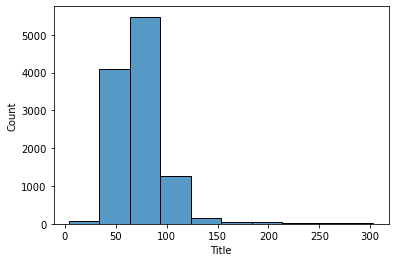

In [22]:
# Check length of headlines
# Character lengths seem to be around tweet length

sns.histplot(data=data['Title'].str.len(), bins=10)

<AxesSubplot:xlabel='Title', ylabel='Count'>

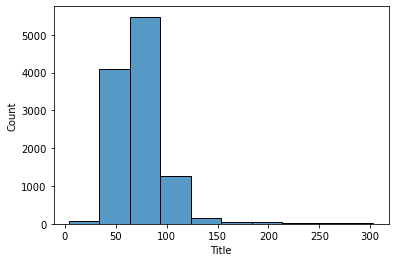

In [29]:
# Check length of headlines in # words, word length?

In [50]:
# Check filler/stopwords

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [53]:
def plot_top_stopwords_barchart(text):
   
    new= data['Title'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stopwords:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

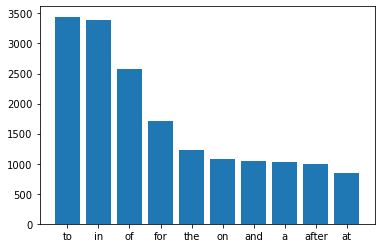

In [54]:
plot_top_stopwords_barchart(data['Title'])

In [60]:
corpus=[]
new= data['Title'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
corpus

['Man',
 'dies',
 'after',
 'police',
 'kneel',
 'on',
 'his',
 'neck',
 'for',
 'nearly',
 '5',
 'minutes,',
 'family',
 'says',
 'in',
 'wrongful',
 'death',
 'claim',
 'Texan',
 'files',
 '$1',
 'billion',
 'class-action',
 'lawsuit',
 'after',
 'receiving',
 '$9,000',
 'electric',
 'bill',
 'Trump',
 'tax',
 'returns',
 'are',
 'now',
 'in',
 'the',
 'hands',
 'of',
 'the',
 'Manhattan',
 'district',
 'attorney',
 'Minneapolis',
 'police',
 'officers',
 'must',
 'keep',
 'body',
 'cameras',
 'turned',
 'on',
 'during',
 'entire',
 'response',
 'to',
 'a',
 'call,',
 'new',
 'policy',
 'says',
 'Costco',
 'lifts',
 'minimum',
 'wage',
 'above',
 'Amazon',
 'or',
 'Target',
 'to',
 '$16',
 'per',
 'hour',
 'Jeff',
 'Bezos',
 'to',
 'step',
 'down',
 'as',
 'Amazon',
 'CEO,',
 'Andy',
 'Jassy',
 'to',
 'take',
 'over',
 'in',
 'Q3',
 'The',
 'United',
 'States',
 'is',
 'now',
 'averaging',
 '2',
 'million',
 'vaccine',
 'doses',
 'administered',
 'per',
 'day.',
 'Kenosha',
 'County'

In [63]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common()
most

[('to', 3445),
 ('in', 3397),
 ('of', 2570),
 ('for', 1704),
 ('the', 1227),
 ('on', 1070),
 ('and', 1046),
 ('a', 1028),
 ('after', 999),
 ('at', 847),
 ('with', 822),
 ('as', 675),
 ('says', 610),
 ('US', 606),
 ('from', 590),
 ('by', 554),
 ('police', 545),
 ('Capitol', 542),
 ('U.S.', 538),
 ('is', 499),
 ('over', 454),
 ('man', 404),
 ('who', 371),
 ('COVID-19', 351),
 ('New', 327),
 ('vaccine', 308),
 ('be', 304),
 ('The', 293),
 ('arrested', 278),
 ('Man', 277),
 ('say', 262),
 ('Police', 259),
 ('has', 245),
 ('new', 244),
 ('charged', 244),
 ('officer', 243),
 ('against', 238),
 ('killed', 234),
 ('that', 232),
 ('will', 230),
 ('Covid', 227),
 ('was', 225),
 ('people', 223),
 ('Texas', 222),
 ('A', 220),
 ('are', 218),
 ('death', 205),
 ('during', 201),
 ('million', 198),
 ('up', 197),
 ('China', 194),
 ('his', 188),
 ('shooting', 188),
 ('not', 186),
 ('more', 184),
 ('Black', 182),
 ('it', 182),
 ('have', 179),
 ('|', 179),
 ('woman', 178),
 ('into', 176),
 ('out', 174),
 (

In [68]:
x, y= [], []
for word,count in most[:40]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

<AxesSubplot:>

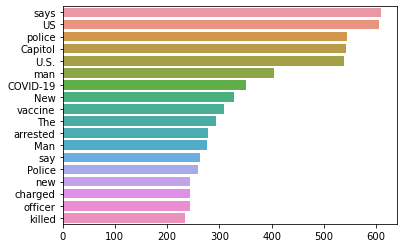

In [70]:
sns.barplot(x=y,y=x)

In [77]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

<AxesSubplot:>

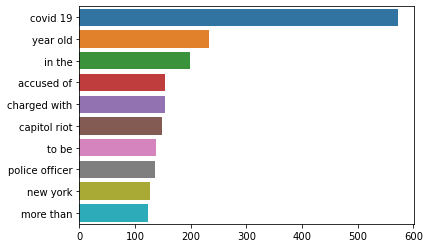

In [78]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(data['Title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

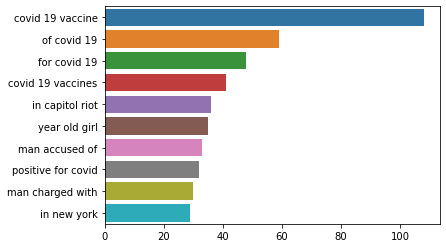

In [80]:
top_tri_grams=get_top_ngram(data['Title'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

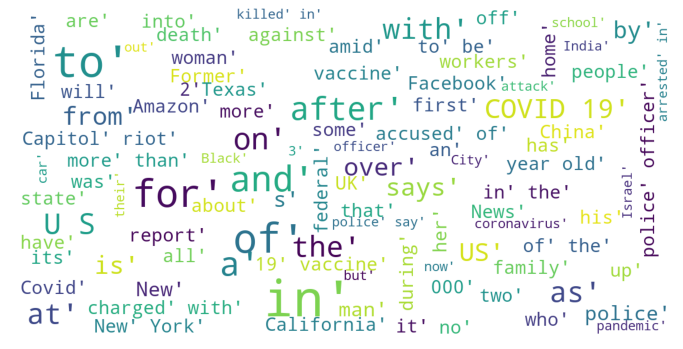

In [84]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))    
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')    
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(corpus)

In [87]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

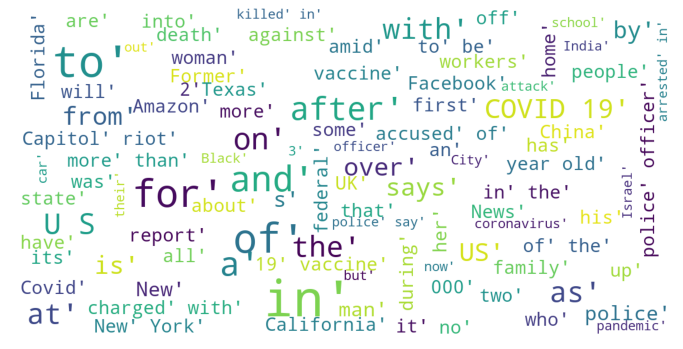

In [91]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(data))    
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')    
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(corpus)